# Starters
## Import Packages

In [1]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
sns.set_style('darkgrid')

## Helpers functions

In [4]:
# Function to quickly describe data
def data_desc(my_imported_data):
    print(my_imported_data.dropna(how = 'all').shape) #pour voir si certaines lignes comportent des valeurs NaN partout (Non)
    print(my_imported_data.shape)
    return(my_imported_data.dtypes)

# Function to return in a dictionary ratio of nan values per variable sorted in descending order
def display_nan_Values(my_imported_data):
    nan_dict = {my_imported_data.columns[var]: my_imported_data.iloc[:,var].isna().mean()
                     for var in range(my_imported_data.shape[1])}
    sorted_dict_by_nanvalues = sorted(nan_dict.items(), key=lambda x:x[1], reverse=True)
    sorted_dict = dict(sorted_dict_by_nanvalues)
    return sorted_dict

# Function for replacing UPPERCASE with lowercase in variables names using title()
def columns_title_format(my_imported_data): 
    data_columns = list(my_imported_data.columns)
    data_columns = [col.title() for col in data_columns]
    print(data_columns)
    my_imported_data.columns = data_columns
    my_imported_data.head()
    return my_imported_data

# Function To project a variable onto a dataframe
def present_variable_in_tab(my_dataset, variable_col, variable_new_name):
    effectifs = my_dataset[variable_col].value_counts()
    modalites = effectifs.index # l'index des effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [variable_new_name]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(my_dataset) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(by=[variable_new_name]) #n would be of use if many values had a on the first column of nutrigrade
    #tab.index = [1, 2, 3 ,4 ,5]
    return(tab)


In [5]:
# Function to estimate percentage of null values for each variable in the dataset
def compute_nan_P(dataset):
    data_isna_P = (dataset.isna().sum()) * 100/len(dataset)
    cols = [x for x in range (dataset.shape[1])]
    count =0
    for ii in data_isna_P.index:
        count +=1
        if (data_isna_P[ii] > 55):
            #countna = +1
            cols.remove(count-1)
            print (ii)
        else:
            continue
    return (data_isna_P, cols)

In [6]:
# Function to compute linear regression
def iterate_regression(X, y):
    Lr = LinearRegression()

    # step1(): train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)        
    plt.scatter(x_train, y_train, label = 'Training data', color = 'red', alpha=.7)
    plt.scatter (x_test, y_test, label ='Testing data', color ='g', alpha=.7)
    plt.legend()
    plt.title('Test Train Split')
    plt.show()
    # step2(): fit
    Lr.fit(x_train.values.reshape(-1, 1), y_train.values)
    # step3(): predict
    prediction = Lr.predict(x_test.values.reshape(-1, 1))
    plt.plot(x_test, prediction, label ='Linear Regression', color ='b')
    plt.scatter(x_test, y_test, label ='Test data', color ='g', alpha=.7)
    plt.legend()
    plt.show()
    # step 4: Compute score 
    FirstReg_score = Lr.score(x_test.values.reshape(-1, 1), y_test.values)
    Lr.get_params(deep=True)

In [7]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


In [8]:
# Function to display fcatorial planes
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

## Import data

In [9]:
imported_data=pd.read_csv("/Users/souha_kassab/OC_project3/static/csv/2016_Building_Energy_Benchmarking.csv", decimal='.', low_memory=False)

In [10]:
## Check dtypes & NaN Values 
data_desc(imported_data)

(3376, 46)
(3376, 46)


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

# Data description

## First glance

In [11]:
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [12]:
# Formating columns titles
columns_title_format(imported_data)

['Osebuildingid', 'Datayear', 'Buildingtype', 'Primarypropertytype', 'Propertyname', 'Address', 'City', 'State', 'Zipcode', 'Taxparcelidentificationnumber', 'Councildistrictcode', 'Neighborhood', 'Latitude', 'Longitude', 'Yearbuilt', 'Numberofbuildings', 'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking', 'Propertygfabuilding(S)', 'Listofallpropertyusetypes', 'Largestpropertyusetype', 'Largestpropertyusetypegfa', 'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa', 'Thirdlargestpropertyusetype', 'Thirdlargestpropertyusetypegfa', 'Yearsenergystarcertified', 'Energystarscore', 'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)', 'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)', 'Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 'Electricity(Kwh)', 'Electricity(Kbtu)', 'Naturalgas(Therms)', 'Naturalgas(Kbtu)', 'Defaultdata', 'Comments', 'Compliancestatus', 'Outlier', 'Totalghgemissions', 'Ghgemissionsintensity']


,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [13]:
imported_data.head()

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [14]:
## How many unique values per entry?
imported_data.nunique()

Osebuildingid                      3376
Datayear                              1
Buildingtype                          8
Primarypropertytype                  24
Propertyname                       3362
Address                            3354
City                                  1
State                                 1
Zipcode                              55
Taxparcelidentificationnumber      3268
Councildistrictcode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
Yearbuilt                           113
Numberofbuildings                    17
Numberoffloors                       50
Propertygfatotal                   3195
Propertygfaparking                  496
Propertygfabuilding(S)             3193
Listofallpropertyusetypes           466
Largestpropertyusetype               56
Largestpropertyusetypegfa          3122
Secondlargestpropertyusetype         50
Secondlargestpropertyusetypegfa    1352


In [15]:
imported_data[imported_data.duplicated()].shape

(0, 46)

## Data cleaning

In [16]:
imported_data.columns

Index(['Osebuildingid', 'Datayear', 'Buildingtype', 'Primarypropertytype',
       'Propertyname', 'Address', 'City', 'State', 'Zipcode',
       'Taxparcelidentificationnumber', 'Councildistrictcode', 'Neighborhood',
       'Latitude', 'Longitude', 'Yearbuilt', 'Numberofbuildings',
       'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking',
       'Propertygfabuilding(S)', 'Listofallpropertyusetypes',
       'Largestpropertyusetype', 'Largestpropertyusetypegfa',
       'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa',
       'Thirdlargestpropertyusetype', 'Thirdlargestpropertyusetypegfa',
       'Yearsenergystarcertified', 'Energystarscore', 'Siteeui(Kbtu/Sf)',
       'Siteeuiwn(Kbtu/Sf)', 'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)',
       'Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)',
       'Electricity(Kwh)', 'Electricity(Kbtu)', 'Naturalgas(Therms)',
       'Naturalgas(Kbtu)', 'Defaultdata', 'Comments', 'Compliancestatus',
       'Outlier

In [17]:
## Percentage of Nan values per variable
display_nan_Values(imported_data)

{'Comments': 1.0,
 'Outlier': 0.990521327014218,
 'Yearsenergystarcertified': 0.9647511848341233,
 'Thirdlargestpropertyusetype': 0.8234597156398105,
 'Thirdlargestpropertyusetypegfa': 0.8234597156398105,
 'Secondlargestpropertyusetype': 0.5026658767772512,
 'Secondlargestpropertyusetypegfa': 0.5026658767772512,
 'Energystarscore': 0.2497037914691943,
 'Largestpropertyusetype': 0.005924170616113744,
 'Largestpropertyusetypegfa': 0.005924170616113744,
 'Zipcode': 0.004739336492890996,
 'Listofallpropertyusetypes': 0.002665876777251185,
 'Sourceeui(Kbtu/Sf)': 0.002665876777251185,
 'Sourceeuiwn(Kbtu/Sf)': 0.002665876777251185,
 'Steamuse(Kbtu)': 0.002665876777251185,
 'Electricity(Kwh)': 0.002665876777251185,
 'Electricity(Kbtu)': 0.002665876777251185,
 'Naturalgas(Therms)': 0.002665876777251185,
 'Naturalgas(Kbtu)': 0.002665876777251185,
 'Totalghgemissions': 0.002665876777251185,
 'Ghgemissionsintensity': 0.002665876777251185,
 'Numberofbuildings': 0.002369668246445498,
 'Siteeui(Kbtu/

In [18]:
[nan_data, data_cols] = compute_nan_P(imported_data)

Thirdlargestpropertyusetype
Thirdlargestpropertyusetypegfa
Yearsenergystarcertified
Comments
Outlier


In [19]:
## Check for duplicates at same address
print('Number of buildings with different Id but at the same location is',
      imported_data['Address'].duplicated().sum())
ppty_at_same_address = imported_data[(imported_data['Address'].duplicated())]
ppty_at_same_address

Number of buildings with different Id but at the same location is 22


,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Comments,Compliancestatus,Outlier,Totalghgemissions,Ghgemissionsintensity
136,224,2016,NonResidential,Retail Store,Westwood Village - Building B,2600 SW Barton St,Seattle,WA,98126.0,3624039009,...,7.690803e+05,2.624102e+06,66061.210940,6606121.0,False,NaN,Compliant,NaN,369.14,5.45
157,248,2016,Nonresidential COS,Warehouse,SCL SSC Building B,3613 4th Ave S,Seattle,WA,98134.0,7666205660,...,1.151435e+06,3.928695e+06,0.000000,0.0,False,NaN,Compliant,NaN,27.39,0.47
349,491,2016,NonResidential,Small- and Mid-Sized Office,South Tower,100 West Harrison,Seattle,WA,98119.0,1989200740,...,1.023767e+06,3.493093e+06,0.000000,0.0,False,NaN,Compliant,NaN,24.35,0.28
582,779,2016,NonResidential,Large Office,Administration Building,500 5TH AVE,Seattle,WA,98104.0,0942000920,...,3.289862e+06,1.122501e+07,0.000000,0.0,False,NaN,Compliant,NaN,390.67,1.74
587,785,2016,Nonresidential COS,Other,Airport Way Ctr - Bldg A,2203 Airport Way S,Seattle,WA,98134.0,7666203240,...,3.741538e+06,1.276613e+07,17030.980470,1703098.0,False,NaN,Compliant,NaN,179.45,1.81
697,19654,2016,NonResidential,Laboratory,1100 Olive Lab,1100 Olive Way,Seattle,WA,98101.0,0660002030,...,2.125319e+06,7.251588e+06,0.000000,0.0,False,NaN,Compliant,NaN,50.55,1.13
1436,21794,2016,NonResidential,K-12 School,Peyton,2400 11th Ave East,Seattle,WA,98102.0,2025049007,...,3.706718e+05,1.264732e+06,12133.129880,1213313.0,False,NaN,Compliant,NaN,73.26,1.68
1923,23835,2016,NonResidential,Small- and Mid-Sized Office,South Seattle Business Park - Bldg B,4636 East Marginal Way South,Seattle,WA,98134.0,3573200250,...,3.178645e+05,1.084554e+06,0.000000,0.0,False,NaN,Compliant,NaN,7.56,0.32
1969,23975,2016,Nonresidential COS,Warehouse,Airport Way Ctr - Bldg D,2203 Airport Way S,Seattle,WA,98134.0,7666203240,...,1.212340e+05,4.136500e+05,3504.440186,350444.0,False,NaN,Compliant,NaN,21.50,0.94
1970,23976,2016,Nonresidential COS,Mixed Use Property,Airport Way Ctr - Bldg E,2203 Airport Way S,Seattle,WA,98134.0,7666203240,...,4.609156e+05,1.572644e+06,27510.277340,2751028.0,False,NaN,Compliant,NaN,157.07,6.80


92 outliers : properties with zero buildings??

# Data preparation 

In [21]:
first_dataset = pd.read_csv('/Users/souha_kassab/OC_project3/static/csv/second_clean_dataset_3_1.csv', index_col=[0])
#imported_data.iloc[:, data_cols]
data_desc(first_dataset)
# -------------------------------------------------------------------------------

(3364, 41)
(3364, 41)


Osebuildingid                        int64
Datayear                             int64
Buildingtype                        object
Primarypropertytype                 object
Propertyname                        object
Address                             object
City                                object
State                               object
Zipcode                            float64
Taxparcelidentificationnumber       object
Councildistrictcode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
Yearbuilt                            int64
Numberofbuildings                  float64
Numberoffloors                       int64
Propertygfatotal                     int64
Propertygfaparking                   int64
Propertygfabuilding(S)               int64
Listofallpropertyusetypes           object
Largestpropertyusetype              object
Largestpropertyusetypegfa          float64
Secondlarge

In [22]:
first_dataset.head()

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
0,1,2016,NonResidential,Hotel,Mayflower_park_hotel,405_Olive_way,Seattle,WA,98101.0,0659000030,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount_Hotel,724_Pine_street,Seattle,WA,98101.0,0659000220,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The_Westin_Seattle,1900_5th_Avenue,Seattle,WA,98101.0,0659000475,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL_MAX,620_STEWART_ST,Seattle,WA,98101.0,0659000640,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK_SEATTLE_HOTEL_(ID8),401_LENORA_ST,Seattle,WA,98121.0,0659000970,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


In [23]:
#check for duplicated property name
print('Number of buildings with different Id but at the same location is',
      first_dataset['Propertyname'].duplicated().sum())
same_ppty_name = first_dataset[(first_dataset['Propertyname'].duplicated())
                               & (first_dataset['Address'].is_unique==False)]
same_ppty_name['Propertyname']

Number of buildings with different Id but at the same location is 14


1324                      Lakeview
1462                    South_Park
1556                  Central_Park
1566                Canal_Building
1574       Garden_Court_Apartments
1644               Northgate_Plaza
1800                      Fairview
1965              Bayview_Building
1968                   Airport_Way
2081    Jefferson_Court_Apartments
2367                      Parkside
2609               Northgate_Plaza
2966          Crestview_Apartments
3266                 Pine_Building
Name: Propertyname, dtype: object

In [ ]:
same_ppty_name

In [ ]:
bldngs_same_name = first_dataset[first_dataset['Numberofbuildings']==0]
bldngs_same_name

In [24]:
Nan_ghg_emissions = first_dataset[first_dataset['Totalghgemissions'].isna()==True]
Nan_ghg_emissions

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
1768,23355,2016,Multifamily_LR_(1-4),Low-Rise_Multifamily,GRAHAM_VIEW,6040_CALIFORNIA_AVE_SW,Seattle,WA,98136.0,7625703280,...,5.937986e+05,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
2321,25431,2016,Multifamily_LR_(1-4),Low-Rise_Multifamily,PONDERAY_APTS,5625_15TH_AVE_NE,Seattle,WA,98105.0,5226300030,...,7.975070e+05,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
2480,25763,2016,Multifamily_LR_(1-4),Low-Rise_Multifamily,Villa_Andora,1520_CALIFORNIA_AVE_SW,Seattle,WA,98116.0,9272201340,...,1.126782e+06,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
3348,50082,2016,Multifamily_LR_(1-4),Low-Rise_Multifamily,STREAM_FIFTEEN,605_15TH_AVE_E,Seattle,WA,98112.0,3303700030,...,8.576127e+05,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN


In [25]:
first_dataset = first_dataset.drop(Nan_ghg_emissions.index, axis=0)

In [26]:
first_dataset.isna().sum()

Osebuildingid                         0
Datayear                              0
Buildingtype                          0
Primarypropertytype                   0
Propertyname                          0
Address                               0
City                                  0
State                                 0
Zipcode                              16
Taxparcelidentificationnumber         0
Councildistrictcode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
Yearbuilt                             0
Numberofbuildings                     0
Numberoffloors                        0
Propertygfatotal                      0
Propertygfaparking                    0
Propertygfabuilding(S)                0
Listofallpropertyusetypes             0
Largestpropertyusetype               11
Largestpropertyusetypegfa            11
Secondlargestpropertyusetype       1683
Secondlargestpropertyusetypegfa    1683


In [27]:
first_dataset.describe(include='all')

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity
count,3360.000000,3360.0,3360,3360,3360,3360,3360,3360,3344.000000,3360,...,3.359000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3360,3360,3360.000000,3360.000000
unique,NaN,NaN,8,24,3346,3338,1,1,NaN,3252,...,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise_Multifamily,Northgate_Plaza,309_South_Cloverdale_Street,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
freq,NaN,NaN,1456,979,3,4,3360,3360,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,3248,3207,NaN,NaN
mean,21219.155952,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.956340,NaN,...,5.293001e+06,2.751680e+05,1.088903e+06,3.715336e+06,1.371356e+04,1.371356e+06,NaN,NaN,119.973396,1.178366
std,12220.284877,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.645821,NaN,...,1.596231e+07,3.916228e+06,4.356728e+06,1.486516e+07,6.716477e+04,6.716477e+06,NaN,NaN,539.365637,1.822557
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,-0.800000,-0.020000
25%,20003.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,9.803802e+05,0.000000e+00,1.882482e+05,6.423028e+05,0.000000e+00,0.000000e+00,NaN,NaN,9.580000,0.210000
50%,23114.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,1.915151e+06,0.000000e+00,3.461780e+05,1.181159e+06,3.253740e+03,3.253740e+05,NaN,NaN,34.025000,0.620000
75%,25996.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,4.392592e+06,0.000000e+00,8.303788e+05,2.833252e+06,1.190571e+04,1.190571e+06,NaN,NaN,94.070000,1.380000


Negative values on electricity consumption, Total emissions and GHGemissions intensity

In [29]:
first_dataset[first_dataset['Electricity(Kwh)']<0]['Siteenergyuse(Kbtu)']

Series([], Name: Siteenergyuse(Kbtu), dtype: float64)

In [28]:
#first_dataset[first_dataset['Electricity(Kwh)']<0]
first_dataset.drop(3206, axis=0, inplace=True)

In [ ]:
(first_dataset[first_dataset['Electricity(Kwh)']<0]['Siteenergyuse(Kbtu)'] * 52.44/1000)[1]

In [32]:
first_dataset.shape

(3359, 41)

## Isolating non-residential buildings

In [33]:
def is_family(item):
    return "multifamily" in item or "Multifamily" in item

In [34]:
first_dataset[first_dataset['Primarypropertytype'].map(is_family)].index

Int64Index([   9,  165,  173,  188,  189,  190,  486,  503,  505,  508,
            ...
            3345, 3346, 3349, 3350, 3351, 3352, 3353, 3355, 3357, 3358],
           dtype='int64', length=1648)

In [35]:
indextodrop = first_dataset[first_dataset['Primarypropertytype'].map(is_family)].index
first_dataset.drop(indextodrop, axis=0, inplace=True)
print(first_dataset.shape)

(1711, 41)


In [36]:
len(first_dataset)/len(imported_data)*100

50.68127962085308

In [37]:
first_dataset.shape

(1711, 41)

In [38]:
first_dataset.duplicated().sum()

0

# Statistical description

In [39]:
first_dataset.columns

Index(['Osebuildingid', 'Datayear', 'Buildingtype', 'Primarypropertytype',
       'Propertyname', 'Address', 'City', 'State', 'Zipcode',
       'Taxparcelidentificationnumber', 'Councildistrictcode', 'Neighborhood',
       'Latitude', 'Longitude', 'Yearbuilt', 'Numberofbuildings',
       'Numberoffloors', 'Propertygfatotal', 'Propertygfaparking',
       'Propertygfabuilding(S)', 'Listofallpropertyusetypes',
       'Largestpropertyusetype', 'Largestpropertyusetypegfa',
       'Secondlargestpropertyusetype', 'Secondlargestpropertyusetypegfa',
       'Energystarscore', 'Siteeui(Kbtu/Sf)', 'Siteeuiwn(Kbtu/Sf)',
       'Sourceeui(Kbtu/Sf)', 'Sourceeuiwn(Kbtu/Sf)', 'Siteenergyuse(Kbtu)',
       'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 'Electricity(Kwh)',
       'Electricity(Kbtu)', 'Naturalgas(Therms)', 'Naturalgas(Kbtu)',
       'Defaultdata', 'Compliancestatus', 'Totalghgemissions',
       'Ghgemissionsintensity'],
      dtype='object')

## Barplot

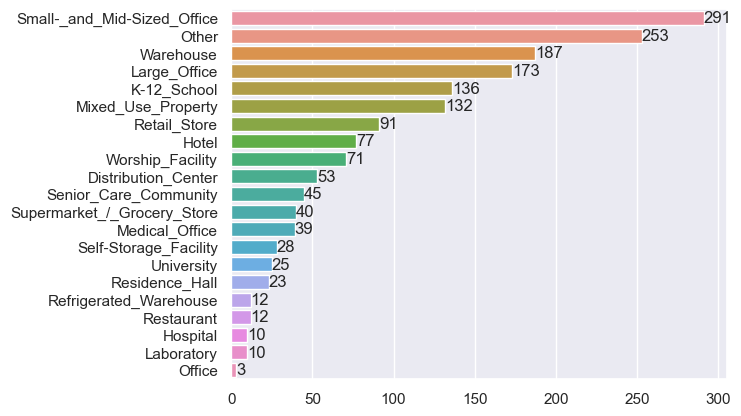

In [40]:
#Illustrate data distribution by property type
count_qualiVar = first_dataset['Primarypropertytype'].value_counts()
#count_qualiVar.values.sort()
#count_qualiVar.index
ax = sns.barplot(y=count_qualiVar.index, x=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.show()

## Scatterplot

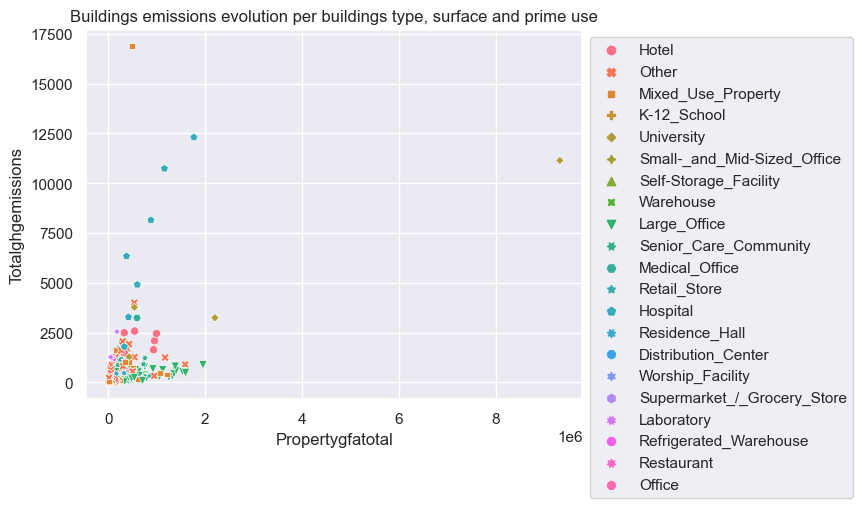

In [41]:
#Sactterplot
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.scatterplot(data=first_dataset, x='Propertygfatotal', y='Totalghgemissions',
 hue='Primarypropertytype', style='Primarypropertytype')
plt.title('Buildings emissions evolution per buildings type, surface and prime use')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

In [42]:
x_surface = np.log(first_dataset[first_dataset['Propertygfabuilding(S)']<9.320156e+06]['Propertygfabuilding(S)'])

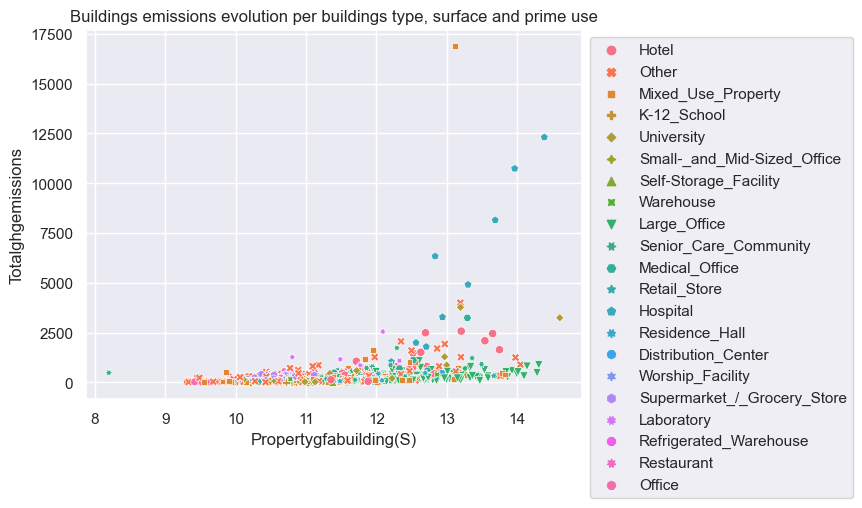

In [43]:
#Sactterplot
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.scatterplot(data=first_dataset, x=x_surface, y='Totalghgemissions',
 hue='Primarypropertytype', style='Primarypropertytype')
plt.title('Buildings emissions evolution per buildings type, surface and prime use')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
first_dataset['Propertygfabuilding(S)']

In [ ]:
# Piled barplot for 'buildingType' and 'Propertyprimarytype'

In [ ]:
## Projection on a table for study of empirical distribution
Total_GHG_emission_projection = present_variable_in_tab(first_dataset, 
                                                'Totalghgemissions', 'bldg_total_emi')
Total_GHG_emission_projection.index = np.arange(1,len(Total_GHG_emission_projection)+1)
Year_projection = present_variable_in_tab(first_dataset, 'Yearbuilt', 
                                                        'Construction_year')
Year_projection.index = np.arange(1,len(Year_projection)+1)

## Boxplot

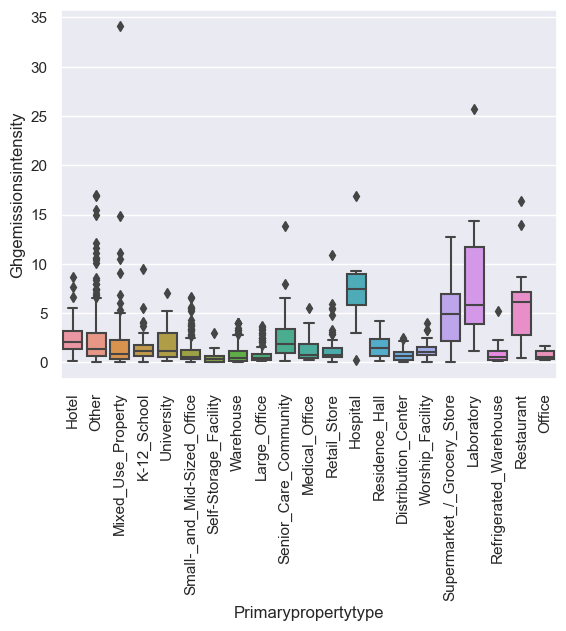

In [44]:
sns.boxplot(x='Primarypropertytype', y="Ghgemissionsintensity", data=first_dataset, 
               showfliers =True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# -------------------------------------------------------------------------------
sns.boxplot(x='Primarypropertytype', y="Totalghgemissions", data=first_dataset, 
               showfliers = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
first_dataset.groupby('Numberoffloors').mean()
pd.crosstab(Year_projection['Construction_year'], Total_GHG_emission_projection.bldg_total_emi, dropna=True)

## Analysis of GHG emissions
### Analysis of central tendencies

In [ ]:
## Diagramme en bâtons
plt.figure(figsize=(5,5))
first_dataset['Compliancestatus'].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

--------------------
Compliant
moy:
 1.6588360450563204
med:
 0.88
mod:
 0    0.23
1    0.28
Name: Ghgemissionsintensity, dtype: float64
var:
 5.67994858263068
ect:
 2.3832642704137283


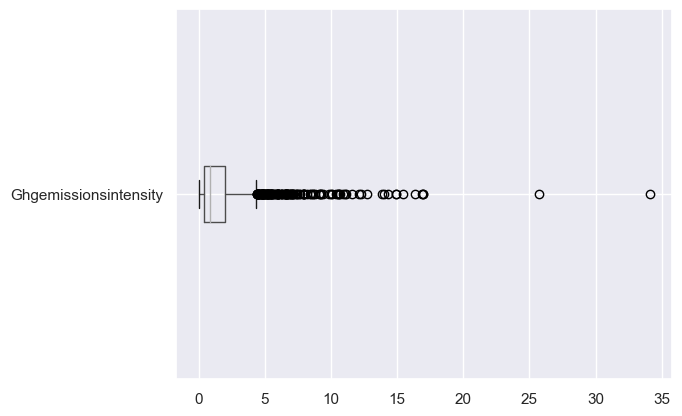

--------------------
Error_-_Correct_Default_Data
moy:
 0.9839772727272726
med:
 0.9299999999999999
mod:
 0    0.51
Name: Ghgemissionsintensity, dtype: float64
var:
 0.31597395402892575
ect:
 0.5621156055732004


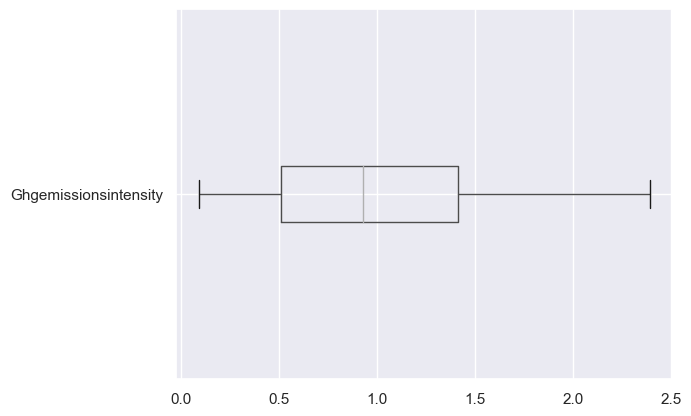

--------------------
Missing_Data
moy:
 0.6909090909090909
med:
 0.26
mod:
 0     0.08
1     0.16
2     0.18
3     0.20
4     0.22
5     0.26
6     0.28
7     1.25
8     1.26
9     1.43
10    2.28
Name: Ghgemissionsintensity, dtype: float64
var:
 0.4946628099173553
ect:
 0.7033226925937732


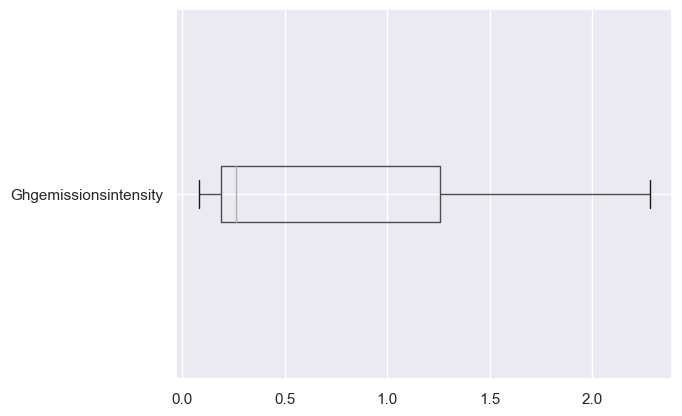

--------------------
Non-Compliant
moy:
 0.32214285714285706
med:
 0.045
mod:
 0    0.00
1    0.01
2    0.03
3    0.19
Name: Ghgemissionsintensity, dtype: float64
var:
 0.37530255102040816
ect:
 0.6126194177631069


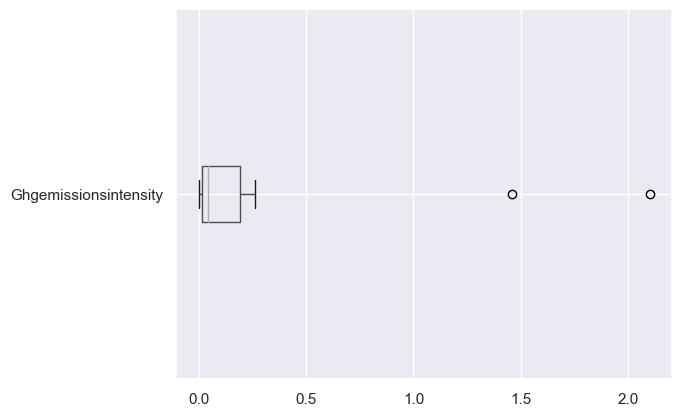

In [45]:
# 5.2. Representing continuous quantitative variables 
# 5.2.1. Central tendency analysis & dispersion measurements
for cat in first_dataset['Compliancestatus'].unique():
    subset = first_dataset.loc[first_dataset['Compliancestatus'] == cat, :] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['Ghgemissionsintensity'].mean())
    print("med:\n",subset['Ghgemissionsintensity'].median())
    print("mod:\n",subset['Ghgemissionsintensity'].mode())
    print("var:\n",subset['Ghgemissionsintensity'].var(ddof=0))
    print("ect:\n",subset['Ghgemissionsintensity'].std(ddof=0))
    #subset["Ghgemissionsintensity"].value_counts(normalize=True).plot(kind='bar',width=0.1)
    #plt.show()
    subset.boxplot(column="Ghgemissionsintensity", showfliers = True, vert=False)
    plt.show()


Handling outliers

In [ ]:
outliers_ghgemissionintensity = first_dataset.loc[(first_dataset['Compliancestatus']== 'Compliant') & (first_dataset['Ghgemissionsintensity']>5)]

In [ ]:
outliers_ghgemissionintensity.index

Drop non-compliant buildings?

In [ ]:
#first_dataset.drop(outliers_ghgemissionintensity.index, axis=0, inplace=True)

In [ ]:
first_dataset.shape

In [46]:
 #first_dataset[first_dataset['Compliancestatus'] == 'Missing_Data']
null_energy=first_dataset[(first_dataset['Siteenergyuse(Kbtu)']==0)
                                 & (first_dataset['Totalghgemissions']==0)]

first_dataset.loc[null_energy.index]

,Osebuildingid,Datayear,Buildingtype,Primarypropertytype,Propertyname,Address,City,State,Zipcode,Taxparcelidentificationnumber,...,Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Defaultdata,Compliancestatus,Totalghgemissions,Ghgemissionsintensity


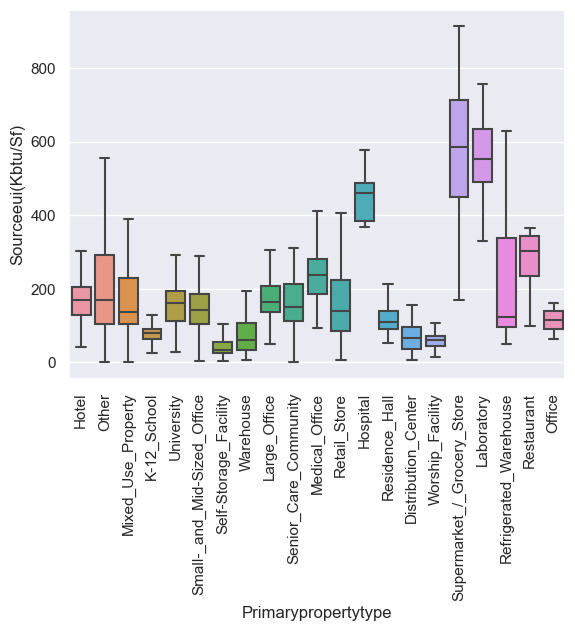

In [47]:
sns.boxplot(x='Primarypropertytype', y="Sourceeui(Kbtu/Sf)", data=first_dataset, 
               showfliers = False)
plt.xticks(rotation=90)
plt.show()

<Figure size 800x800 with 0 Axes>

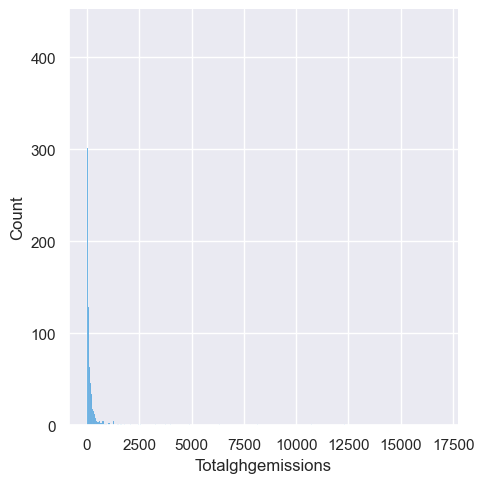

In [48]:
# -------------------------------------------------------------------------------
# 5.2.2. Representing continuous variables using histograms
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(first_dataset[first_dataset.Totalghgemissions>0]["Totalghgemissions"], kde=False)
plt.show()
# -------------------------------------------------------------------------------

In [49]:
#study of normal lohgarithm of Total GHG emissions
x = np.log(first_dataset[first_dataset.Totalghgemissions > 0]["Totalghgemissions"])

<Figure size 800x800 with 0 Axes>

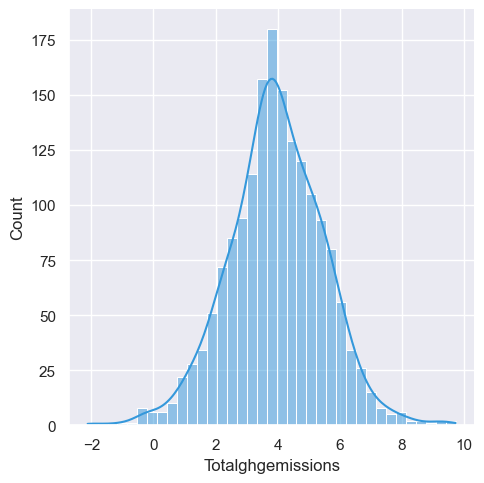

In [50]:
# -------------------------------------------------------------------------------
plt.figure(figsize=(8,8))
palette = sns.color_palette(["#3498db", "#e74c3c"])
sns.set_palette(palette)
sns.displot(x, kde=True)
plt.show()
# -------------------------------------------------------------------------------

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(111)
sns.stripplot(x='Yearbuilt', y = x, hue = 'Primarypropertytype', data = first_dataset)
plt.xticks(rotation=90)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
#ordre_prptype = first_dataset.groupby('Compliancestatus')['Primarypropertytype'].median().sort_values().index
## Stripplot
plt.figure(figsize=[15,10])
plt.subplot(111)
sns.stripplot(x='Buildingtype', y = x, hue = 'Compliancestatus', data = first_dataset)
plt.xticks(rotation=90)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()


Le plus d'outlier semblent exister au niveau des 'campus' avec usage principal en tant qu'hopitaux ou universites, sachant que les usages second et tertiaires seraient la meme(a evrifier)
En moyenne la distribution semble se concentrer autour des memes valeurs 

In [ ]:
##seaborn alternative:
plt.figure()
sns.set_style('darkgrid')
plt.subplot(111)
sns.scatterplot(data=first_dataset, x='Sourceeui(Kbtu/Sf)', y='Ghgemissionsintensity',
 hue='Primarypropertytype', style='Primarypropertytype')
plt.title('Buildings consumption and emissions evolution per years')
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.show()

## Jointplot

In [ ]:
#study of GHG emission intensity evolution with the consumed energy sources
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset[first_dataset['Sourceeui(Kbtu/Sf)']<=1000], x='Sourceeui(Kbtu/Sf)',
              y='Ghgemissionsintensity', kind = 'reg', line_kws={'color': 'red'})
plt.show()

In [ ]:
#log_ghgemissions = np.log(first_dataset.loc[:,'Ghgemissionsintensity'])
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset[first_dataset['Sourceeui(Kbtu/Sf)']<=1000], x='Sourceeui(Kbtu/Sf)',
              y=x, kind = 'reg', line_kws={'color': 'red'})
plt.show()

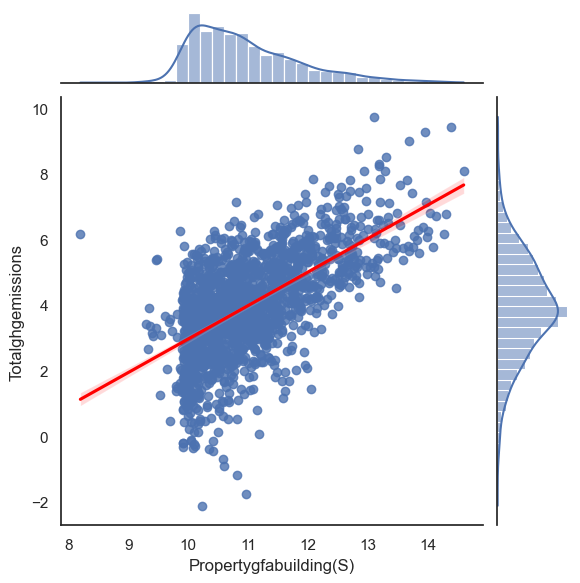

In [51]:
#log_ghgemissions = np.log(first_dataset.loc[:,'Ghgemissionsintensity'])
sns.set(style='white', color_codes=True)
sns.jointplot(data=first_dataset[first_dataset['Sourceeui(Kbtu/Sf)']<=1000], x=x_surface,
              y=x, kind = 'reg', line_kws={'color': 'red'})
plt.show()

# Exploratory Analysis

## Data selection

Isolating all numerical values related to energy consumption

In [53]:
df = first_dataset.select_dtypes(include=['int64', 'float64'])
#df = df.loc[:, 'Siteenergyuse(Kbtu)':]
my_cols = df.columns
explored_dataset = first_dataset[my_cols]
explored_dataset.describe(include='all')

,Osebuildingid,Datayear,Zipcode,Councildistrictcode,Latitude,Longitude,Yearbuilt,Numberofbuildings,Numberoffloors,Propertygfatotal,...,Sourceeuiwn(Kbtu/Sf),Siteenergyuse(Kbtu),Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kwh),Electricity(Kbtu),Naturalgas(Therms),Naturalgas(Kbtu),Totalghgemissions,Ghgemissionsintensity
count,1711.000000,1711.0,1695.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.00000,1711.000000,1.711000e+03,...,1711.000000,1.711000e+03,1.710000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1711.000000,1711.000000
mean,16712.325541,2016.0,98116.979351,4.362361,47.616453,-122.332928,1962.660432,1.16540,4.174167,1.188306e+05,...,177.100351,8.407560e+06,8.051607e+06,5.178899e+05,1.699387e+06,5.798308e+06,1.982638e+04,1.982638e+06,185.695067,1.606967
std,13878.117234,0.0,18.555515,2.190268,0.048325,0.024830,32.897268,2.89365,6.530634,2.930041e+05,...,183.515180,2.988664e+07,2.180904e+07,5.468867e+06,6.019005e+06,2.053685e+07,9.261375e+04,9.261375e+06,744.920971,2.317724
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.00000,0.000000,1.128500e+04,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,599.500000,2016.0,98105.000000,2.000000,47.585660,-122.343710,1930.000000,1.00000,1.000000,2.980800e+04,...,80.950001,1.249843e+06,1.321927e+06,0.000000e+00,2.145491e+05,7.320410e+05,0.000000e+00,0.000000e+00,20.650000,0.355000
50%,21219.000000,2016.0,98112.000000,4.000000,47.612520,-122.332940,1966.000000,1.00000,2.000000,5.001700e+04,...,133.300003,2.595784e+06,2.738554e+06,0.000000e+00,4.790941e+05,1.634669e+06,5.296180e+03,5.296180e+05,50.220000,0.880000
75%,24710.500000,2016.0,98125.000000,7.000000,47.650190,-122.321485,1990.000000,1.00000,4.000000,1.084990e+05,...,203.299995,6.899401e+06,7.100034e+06,0.000000e+00,1.403697e+06,4.789413e+06,1.537443e+04,1.537444e+06,144.600000,1.900000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.220966,2015.000000,111.00000,99.000000,9.320156e+06,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


In [ ]:
df = first_dataset.select_dtypes(include=['int64', 'float64'])
df = df.loc[:, 'Siteenergyuse(Kbtu)':]

In [ ]:
# Function to filter out components with positive numeric values
def is_not_nan(item):
    output = (isinstance(item, float) or isinstance(item, int)) and item >= 0
    return output

In [ ]:
explored_dataset= explored_dataset.drop(null_energy.index, axis=0)

In [ ]:
explored_dataset.shape

In [ ]:
explored_dataset.isnull().sum()

In [54]:
explored_dataset = explored_dataset.dropna(how='any')

In [ ]:
cond = (first_dataset['Totalghgemissions'].map(is_not_nan)) 
explored_dataset[cond]

In [55]:
len(explored_dataset)

526

In [ ]:
#explored_dataset[explored_dataset['Electricity(Kwh)']<0]
explored_dataset.drop(3206, axis=0, inplace=True)

In [ ]:
explored_dataset[explored_dataset['Totalghgemissions']<=0.0]

In [ ]:
explored_dataset[explored_dataset['Siteenergyusewn(Kbtu)'].isnull()]

In [ ]:
explored_dataset.describe(include='all')

Pairplot

In [ ]:
## Looking for correlated variables
#pairplot_data = explored_dataset.drop(columns = ['Yearbuilt'])
sns.pairplot(data=pairplot_data, hue = 'Yearbuilt', height = 2.5 )
sns.set_style('ticks')

 # Saving Data for Exploratory analysis

In [ ]:
explored_dataset_with_multifamily.to_csv('/Users/souha_kassab/OC_project3/static/csv/explored_dataset_1.csv')

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data split

In [ ]:
## Data split
X = explored_dataset.iloc[:, :-1].values
#first_7dataset.iloc[:, -3]
X[:5]

In [ ]:
X.shape

In [ ]:
#columns in features variable
features = explored_dataset.columns[:-1]
features

In [ ]:
# Instantiate scaler
scaler = StandardScaler()

## Scaling

In [ ]:
X_scaled = scaler.fit_transform(X)
idx = ["mean", "std"]
#reduction et centrage
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

## ACP instanciation

In [ ]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)

## Variance

In [ ]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()
print(scree_cum)

x_list = range(1, len(scree)+1)
list(x_list)

In [ ]:
##plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Components

In [ ]:
pcs = pca.components_
pcs

In [ ]:
##Pandas version
pcs = pd.DataFrame(pcs)
#pcs
##Features labels on cols
pcs.columns = features[:]
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

## Correlation graph

In [ ]:
##Define graph axis
x_y = (0,1)
correlation_graph(pca, x_y, features)

In [ ]:
##Exploring F2 and F3
correlation_graph(pca, (1,2), features)

In [ ]:
##Exploring F2 and F3
if (pca.n_components == 0.99):
    correlation_graph(pca, (2,3), features)

plus de rejets lors de l'utilisation de gaz naturel et de vapeur (produite en brulant des fossiles)?
F1 <=> GhG emissions

## Projection

Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)
Variables concernees: 'OSEBuildingID', 'Address',  'Neighborhood',  'BuildingType', 'YearBuilt', 'LargestPropertyUseType' ; 
NaturalGas(kBtu): 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'
Miscellaneous: 'ComplianceStatus', 'DataYear': Whether a property has met energy benchmarking requirements for the current reporting year.

# Linear Regression
## LR with log-normal on Totalghgemissions, all the features

Linear regression with manual SVD, all datas

### Choice of features

In [ ]:
explored_dataset.head()

In [ ]:
reg_cols = ['Siteenergyuse(Kbtu)', 'Siteenergyusewn(Kbtu)', 'Steamuse(Kbtu)', 
            'Electricity(Kbtu)', 'Naturalgas(Kbtu)', 'Totalghgemissions']

In [198]:
linear_model_dataset = explored_dataset[reg_cols]

### Data separation

In [199]:
del Atrain, btrain, Atest, btest, A, b

In [200]:
H = linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# Permute
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*4/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [201]:
train_sort_ind = np.argsort(btrain)
test_sort_ind = np.argsort(btest)

### Data normalization..?

In [ ]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
std_scale = preprocessing.StandardScaler().fit(Atrain)
A_train_std = std_scale.transform(Atrain)
A_test_std = std_scale.transform(A_test)

In [217]:
A_train_std.mean(axis=0)

array([ 2.66863034e-16,  2.90688983e-16, -4.51028104e-16, -1.12511424e-17,
       -1.28002427e-16,  0.00000000e+00])

### SVD computation

In [219]:
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b

In [223]:
print('Eigen values = ', S)

Eigen values =  [1.69678161e+09 6.63646678e+08 2.82975337e+08 1.84983321e+08
 1.40995666e+07 4.86611106e+01]


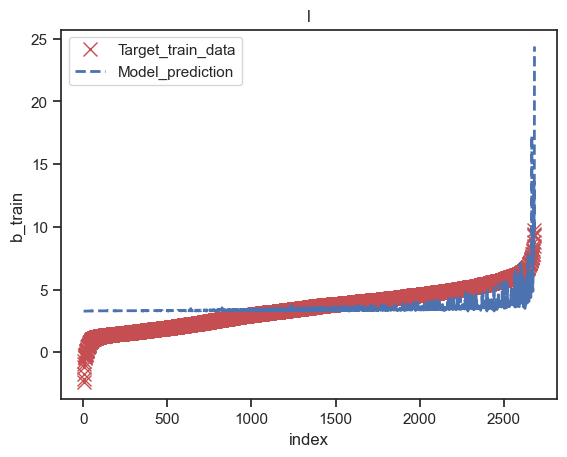

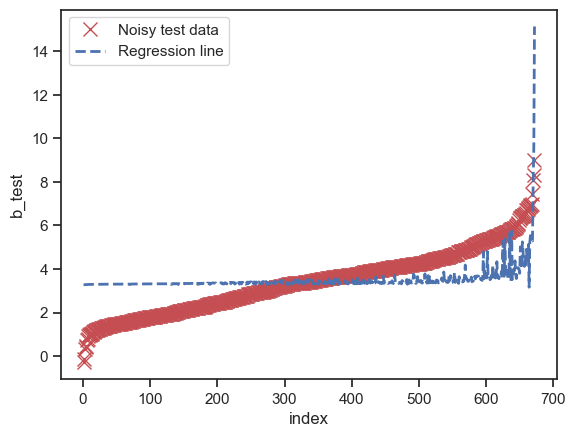

In [179]:
# -----------------------------------------------------
# Train
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain.iloc[train_sort_ind], 'x', color ='r', markersize = 10, label ='Target_train_data' )
plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Model_prediction')
plt.xlabel('index')
plt.ylabel('b_train')
plt.title('l')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest[test_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.title('')
plt.legend()
plt.show()
# -----------------------------------------------------

Feature: 0, Score: -0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000


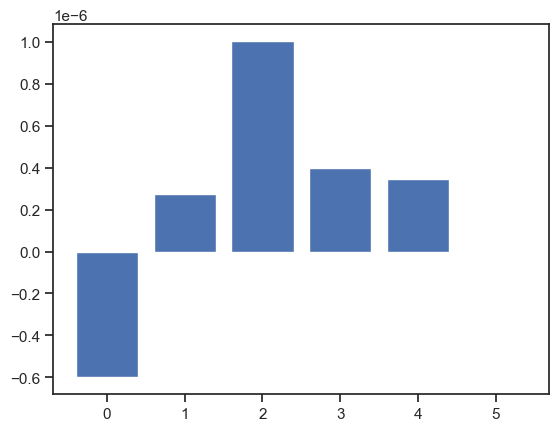

In [182]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(Atest, btest)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Error measurements

In [162]:
MAE_test = sum(abs(btest-Atest@xtilde1)) / len(btest)
MAE_train = sum(abs(btrain-Atrain@xtilde1)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)
#print('Mean absolute error is :', MAE)
# do this for test and for train and compare!

Mean absolute error on the test set = 1.0776352810291294 
 Mean absolute error on the train set = 1.1118469839800476


0.03421170295091813

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

In [163]:
RMSE_train = np.sqrt(sum(np.power(btrain-Atrain@xtilde1, 2))/len(btrain))
RMSE_train

1.3467076558595708

In [164]:
RMSE_test = np.sqrt(sum(np.power(btest-Atest@xtilde1, 2))/len(btest))
RMSE_test

1.2951762109195977

In [165]:
abs(RMSE_test - RMSE_train)

0.05153144493997308

In [166]:
np.power(RMSE_train,2)

1.81362151035078

In [167]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

0.21565336575692204 
 0.21604300640979968


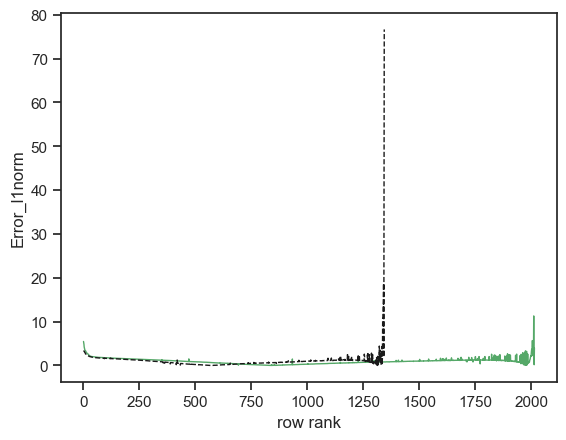

In [150]:
plt.plot(np.arange(1, len(btrain)+1), abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]), 'g-',
         linewidth =1)
plt.plot(np.arange(1, len(btest)+1), abs(Atest[test_sort_ind]@xtilde1-btest.iloc[test_sort_ind]), 'k--',
         linewidth =1)

plt.xlabel('row rank')
plt.ylabel('Error_l1norm')
plt.xticks
plt.show()

## LR with reduced matrix of features

### Choice of features 
Looking for correlated variables

In [130]:
#Spot highly correlated features
linear_model_dataset.corr()

,Siteenergyuse(Kbtu),Siteenergyusewn(Kbtu),Steamuse(Kbtu),Electricity(Kbtu),Naturalgas(Kbtu),Totalghgemissions
Siteenergyuse(Kbtu),1.000000,0.715081,0.604330,0.956551,0.514350,0.862651
Siteenergyusewn(Kbtu),0.715081,1.000000,0.472710,0.587636,0.727587,0.859029
Steamuse(Kbtu),0.604330,0.472710,1.000000,0.546969,0.026795,0.683262
Electricity(Kbtu),0.956551,0.587636,0.546969,1.000000,0.290901,0.691072
Naturalgas(Kbtu),0.514350,0.727587,0.026795,0.290901,1.000000,0.732265
Totalghgemissions,0.862651,0.859029,0.683262,0.691072,0.732265,1.000000


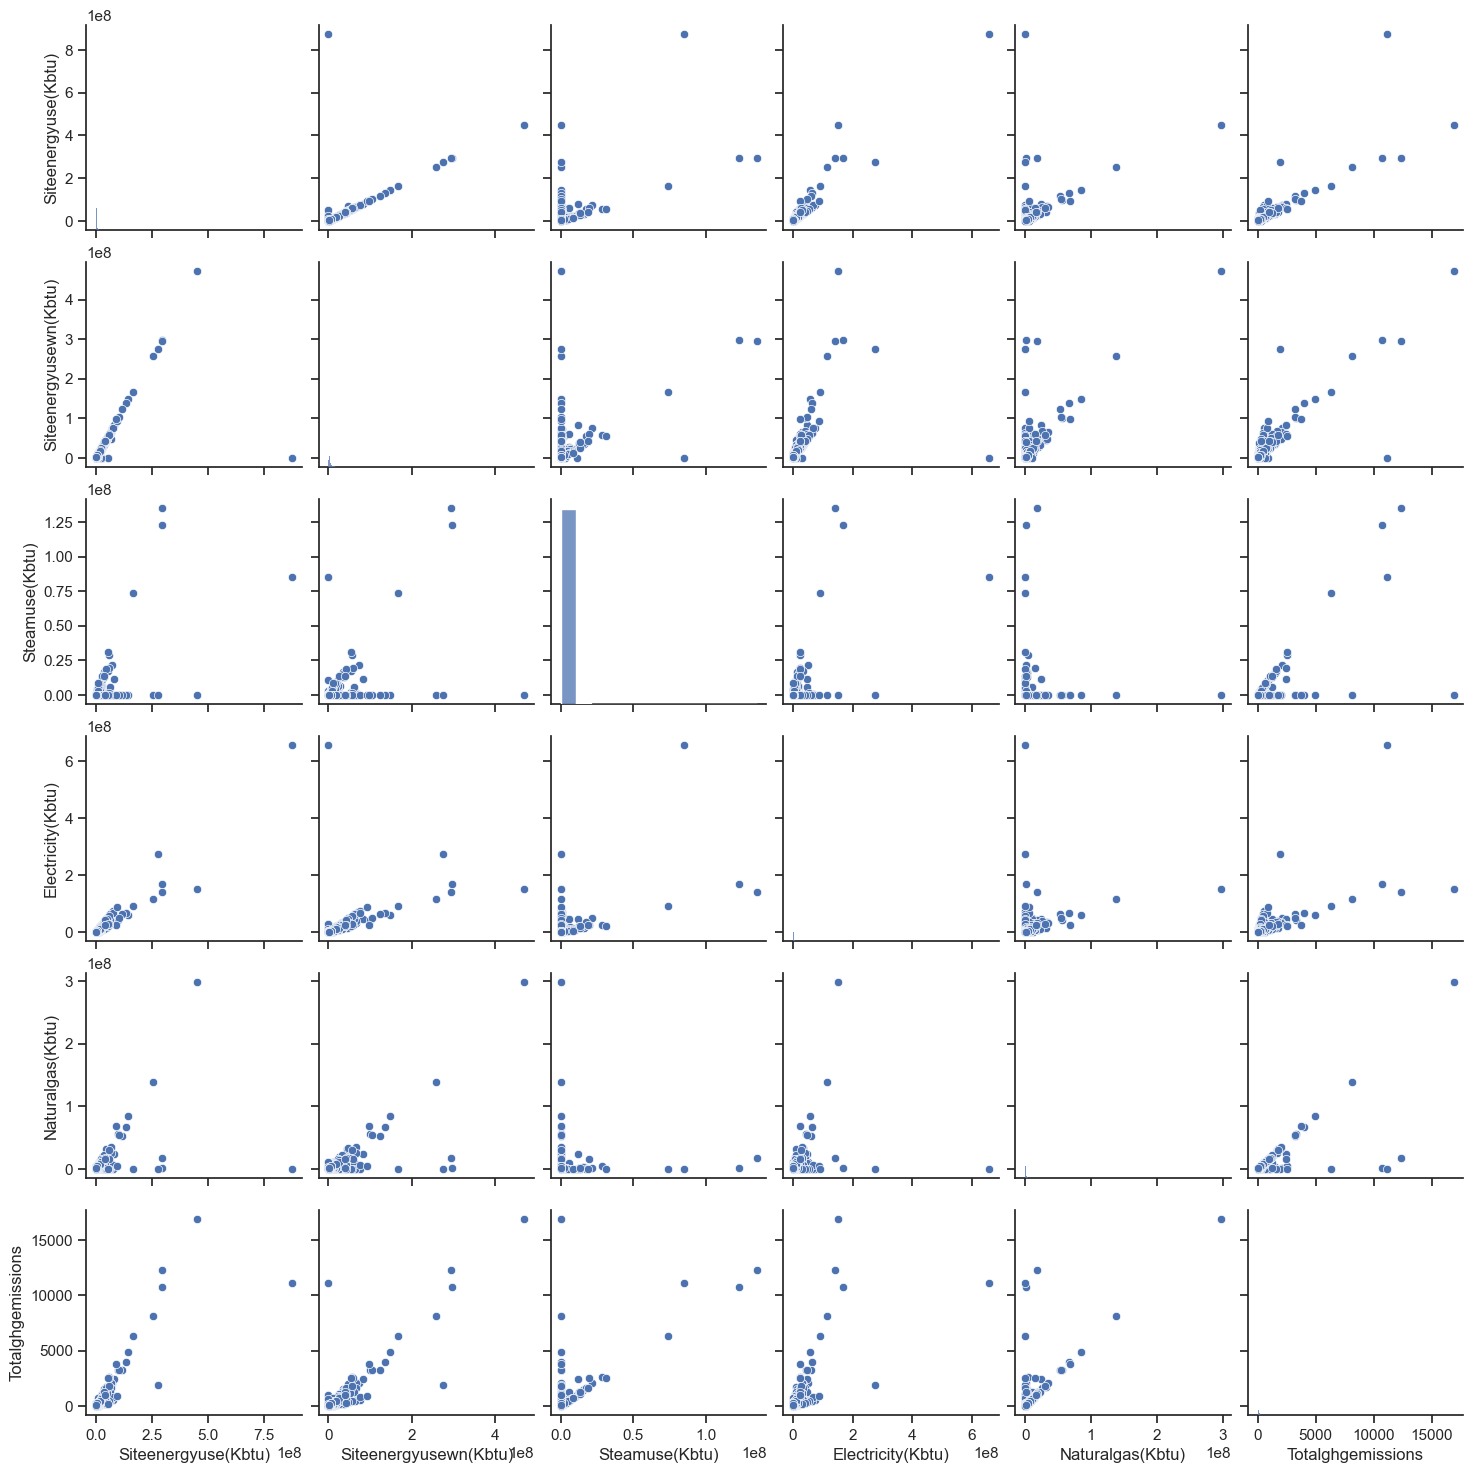

In [133]:
pairplot_data = linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
sns.pairplot(data=pairplot_data, height = 2.5)
sns.set_style('ticks')
#pd.plotting.scatter_matrix(linear_model_dataset, diagonal='kde')

From ACP, we see that Siteneryuse, electricty  are higly correlated with F1, Natural Gas alot with F2 and steam energy with F3, whilst correlation table shows a lot of correlation between electricity and total site use on one hand, and normalized site use  of energy with natural gas consumption on the other. steam consumption seems to be the least correlated to the lot but still strongly correlated with a coefficient of around 0.68.
Site energy use normalized on 30 year weather conditions average might be more relaible than that of a one year correlation with the different source utilisation

In [183]:
##Choose new data
reg_cols = reg_cols = ['Steamuse(Kbtu)', 'Electricity(Kbtu)', 'Naturalgas(Kbtu)', 'Totalghgemissions']
reduced_linear_model_dataset = explored_dataset[reg_cols]

### Data separation

In [184]:
del Atrain, btrain, Atest, btest, A, b, xtilde1

In [185]:
H = reduced_linear_model_dataset[linear_model_dataset['Totalghgemissions']>0]
b = H.iloc[:, -1] # Total emissions
b = np.log(abs(b))
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
# Permute
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
# Separate data
n = int(len(H)*3/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [186]:
train_sort_ind = np.argsort(btrain)
test_sort_ind = np.argsort(btest)

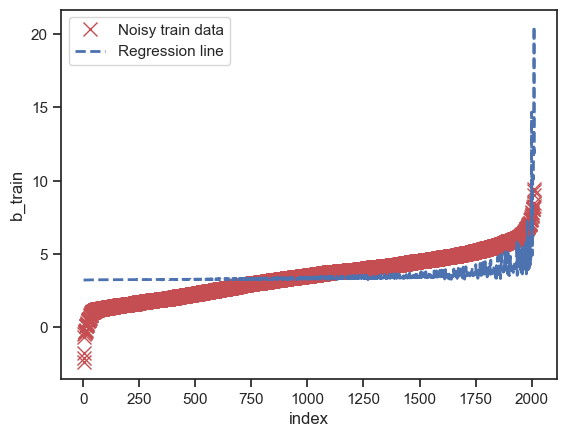

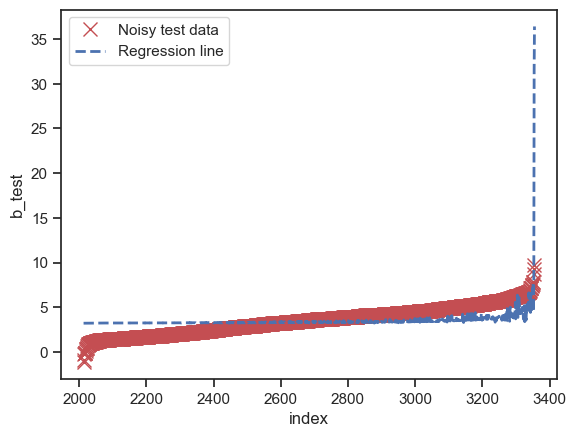

In [187]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain.iloc[train_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain[train_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_train')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(n, n+len(btest)), btest.iloc[test_sort_ind], 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(n, n+len(btest)), Atest[test_sort_ind]@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
plt.show()
# -----------------------------------------------------

In [ ]:
# define the model
model = LinearRegression()
# fit the model
model.fit(Atrain, btrain)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [196]:
xtilde1

array([1.18424169e-08, 4.17078149e-08, 9.03519888e-08, 3.21546382e+00])

In [188]:
MAE_test = sum(abs(btest-Atest@xtilde1)) / len(btest)
MAE_train = sum(abs(btrain-Atrain@xtilde1)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)
#print('Mean absolute error is :', MAE)
# do this for test and for train and compare!

Mean absolute error on the test set = 1.1036608902354712 
 Mean absolute error on the train set = 1.0489757727281994


0.054685117507271785

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

In [189]:
RMSE_train = np.sqrt(sum(np.power(btrain-Atrain@xtilde1, 2))/len(btrain))
RMSE_train

1.27810922096416

In [190]:
RMSE_test = np.sqrt(sum(np.power(btest-Atest@xtilde1, 2))/len(btest))
RMSE_test

1.571399802305557

In [191]:
abs(RMSE_test - RMSE_train)

0.29329058134139707

In [192]:
np.power(RMSE_train,2)

1.633563180713612

In [193]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

0.2750591026534676 
 0.2754192322597005


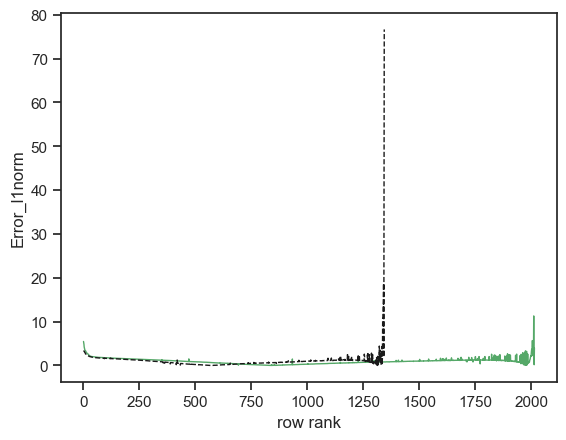

In [150]:
plt.plot(abs(Atrain[train_sort_ind]@xtilde1-btrain.iloc[train_sort_ind]), 'g-',
         linewidth =1)
plt.plot(abs(Atest[test_sort_ind]@xtilde1-btest.iloc[test_sort_ind]), 'k--',
         linewidth =1)

plt.xlabel('row rank')
plt.ylabel('Error_l1norm')
plt.xticks
plt.show()

## Linear Regression with data separation in test and train set

In [ ]:
del Atrain, btrain, Atest, btest, A, b

Separate data into 4/5th training and 1/5th testing set

In [90]:
#Re-define variables
H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
## define portions of data to separate into
n = int(len(linear_model_dataset)*4/5)

btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

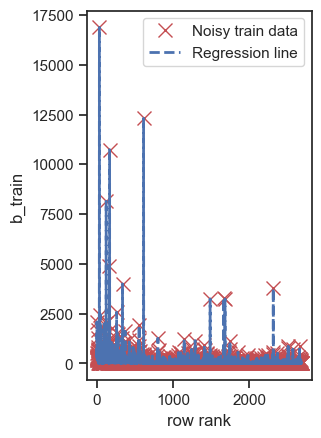

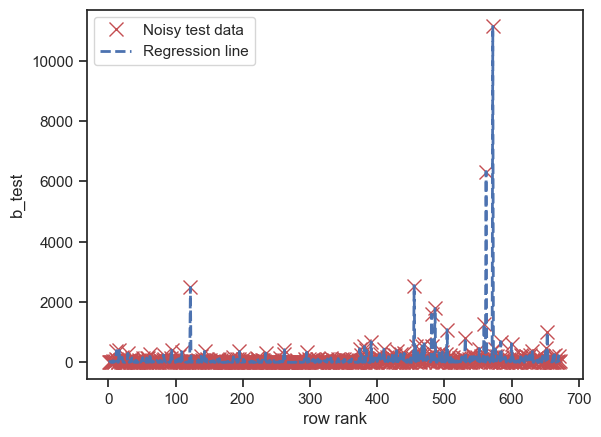

In [92]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde_lin = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain, 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_train')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_test')
plt.legend()
plt.show()
# -----------------------------------------------------

In [93]:
sort_ind = np.argsort(btrain)

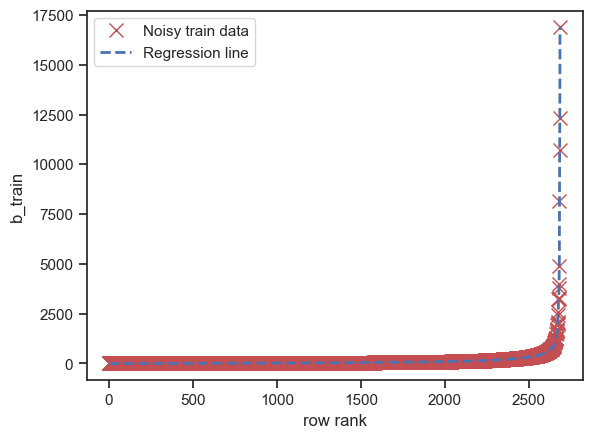

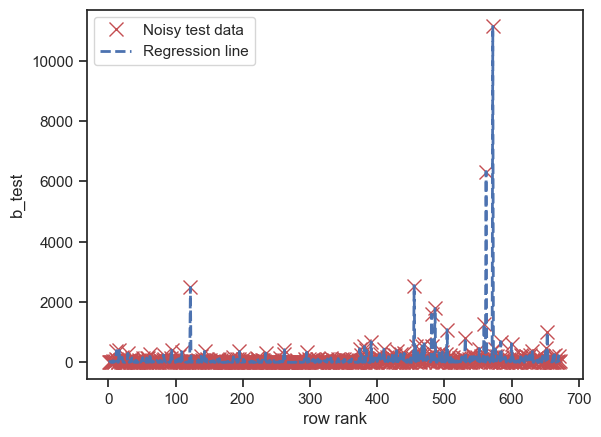

In [94]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde_lin = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain.iloc[sort_ind], 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain[sort_ind]@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_train')
plt.legend()
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest@xtilde_lin, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('row rank')
plt.ylabel('b_test')
plt.legend()
plt.show()
# -----------------------------------------------------

In [95]:
(btrain.iloc[sort_ind]).head()

1323    0.00
513     0.00
2189    0.12
1229    0.17
1295    0.31
Name: Totalghgemissions, dtype: float64

Mean Absolute Error

In [96]:
MAE_test = sum(abs(btest-Atest@xtilde_lin)) / len(btest)
MAE_train = sum(abs(btrain-Atrain@xtilde_lin)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)

Mean absolute error on the test set = 0.0025254598270481685 
 Mean absolute error on the train set = 0.0025338479011996202


8.388074151451704e-06

Root-mean squared error

In [97]:
RMSE_train = np.sqrt(sum(np.power(btrain-Atrain@xtilde_lin, 2))/len(btrain))
RMSE_train

0.002926377175439827

In [98]:
RMSE_test = np.sqrt(sum(np.power(btest-Atest@xtilde_lin, 2))/len(btest))
RMSE_test

0.0030485743944111024

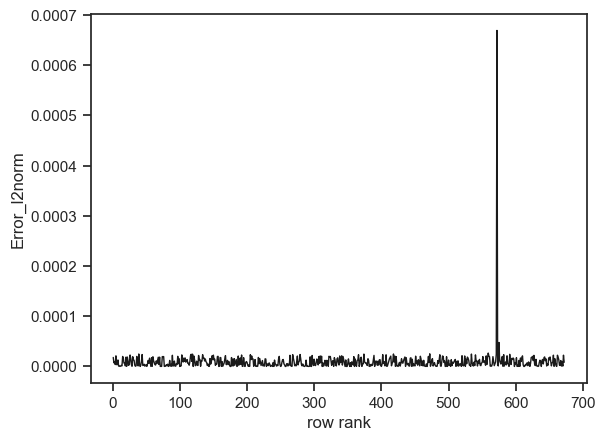

In [100]:
plt.plot(np.arange(1, len(btest)+1), np.power(Atest@xtilde_lin-btest,2), color = 'k',
         linewidth =1)
plt.xlabel('row rank')
plt.ylabel('Error_l2norm')
plt.show()

In [ ]:
n+ np.arange(295,305)

In [ ]:
error_ind = btest.iloc[295:305].index
explored_dataset.loc[error_ind]

## Linear Reg. with prior data shuffling

In [101]:
del Atrain, btrain, Atest, btest, A, b

In [102]:
## separate data in train and test sets after shuffling the data
#Re-define variables
H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
p = np.random.permutation(len(H))
A = A[p, :]
b = b.iloc[p]
n = int(len(H)*3/5)
btrain = b.iloc[:n]
Atrain = A[:n]
btest = b.iloc[n:]
Atest = A[n:]

In [103]:
print(n)
print(len(btrain))

2014
2014


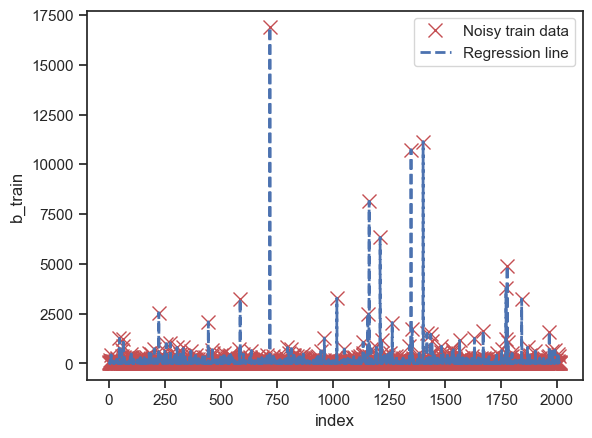

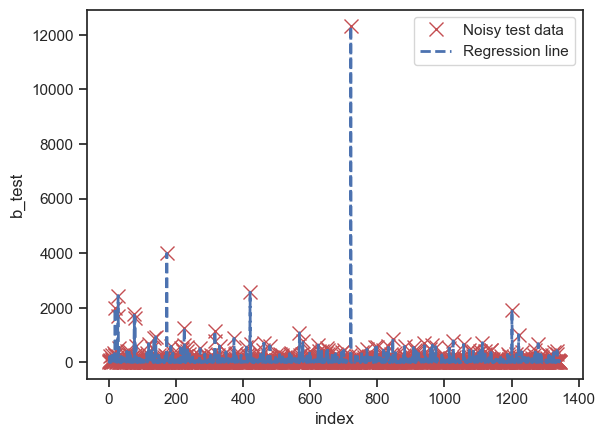

In [104]:
# -----------------------------------------------------
# Train
[U, S, VT] = np.linalg.svd(Atrain, full_matrices=False)
xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
#xtilde2 = np.linalg.pinv(a) * b
ax1 = fig.add_subplot(121)
plt.plot(np.arange(1, n+1), btrain, 'x', color ='r', markersize = 10, label ='Noisy train data' )
plt.plot(np.arange(1, n+1), Atrain@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_train')
plt.legend()
#plt.ylim(0, 3000)
plt.show()
# -----------------------------------------------------
# Test
ax2 = fig.add_subplot(122)
plt.plot(np.arange(1, len(btest)+1), btest, 'x', color ='r', markersize = 10, label ='Noisy test data' )
plt.plot(np.arange(1, len(btest)+1), Atest@xtilde1, '--', color = 'b', linewidth = 2 , label ='Regression line')
plt.xlabel('index')
plt.ylabel('b_test')
plt.legend()
#plt.ylim(0, 2000)
plt.show()
# -----------------------------------------------------

In [105]:
MAE_test = sum(abs(btest-Atest@xtilde1)) / len(btest)
MAE_train = sum(abs(btrain-Atrain@xtilde1)) /  len(btrain)
print( 'Mean absolute error on the test set =', MAE_test,
     '\n', 'Mean absolute error on the train set =', MAE_train)
abs(MAE_test - MAE_train)
#print('Mean absolute error is :', MAE)
# do this for test and for train and compare!

Mean absolute error on the test set = 0.0025255156296452802 
 Mean absolute error on the train set = 0.0025235042620596593


2.0113675856209094e-06

We can see that permuting the dataset prior to constructing the model reduces the MAE difference between train and test set

In [106]:
RMSE_train = np.sqrt(sum(np.power(btrain-Atrain@xtilde1, 2))/len(btrain))
RMSE_train

0.0029139132034866552

In [107]:
RMSE_test = np.sqrt(sum(np.power(btest-Atest@xtilde1, 2))/len(btest))
RMSE_test

0.002921676844690113

In [108]:
abs(RMSE_test - RMSE_train)

7.763641203457992e-06

In [109]:
np.power(RMSE_train,2)

8.490890157453862e-06

In [111]:
y = btrain
y_mean = btrain.mean()
N_samples = len(btrain)
var_mean = sum(np.power(y - y_mean, 2))/N_samples
var_line = np.power(RMSE_train,2)
R2 = (var_mean - var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = y.var()

R2_bis = (var_mean_bis - var_line) / var_mean_bis
print(R2, '\n', R2_bis)

0.9999999999774701 
 0.9999999999774813


## Error estimation 

### Mean Absolute Error (MAE)
The MAE has a big advantage in that the units of the MAE are the same as the units of y, tells us the average error in units of y, the predicted feature. A value of 0 indicates a perfect fit, i.e. all our predictions are spot on. 

In [ ]:
MAE_log_normal = sum(abs(y-^y))/len(samples)
Atest@xtilde1-btest
# do this for test and for train and compare!

R squared error

### Root mean-square error
Its calculation is very similar to MAE, but instead of taking the absolute value to get rid of the sign on the individual errors, we square the error, then we can compute its sum divided by the number of samples and take its square root to get back to the same unit than y

In [ ]:
RMSE = np.sqrt(sum(np.power(y-^y, 2))/len(samples))

Compared to MAE, RMSE gives a higher total error and the gap increases as the errors become larger. It penalizes a few large errors more than a lot of small errors. If you want your model to avoid large errors, use RMSE over MAE. You should also be aware that as the sample size increases, the accumulation of slightly higher RMSEs than MAEs means that the gap between these two measures also increases as the sample size increases

### R-squared 
R2 computes how much better the regression line fits the data than the mean line. An R-squared of 1 indicates a perfect fit. An R-squared of 0 indicates a model no better or worse than the mean. An R-squared of less than 0 indicates a model worse than just predicting the mean.

In [ ]:
var_mean = sum(np.power(y - y_mean, 2))
var_line = N_samples * RMSE
R2 = (var_mean−var_line)/var_mean
## Dividing all by N: (exactly same computation)
var_mean_bis = variance(y)
var_line_bis = RMSE
R2_bis = (var_mean_bis - var_line_bis) / var_mean_bis

In [ ]:
#Using scikit learn
# MAE
mean_absolute_error(actuals, predictions)

# RMSE
sqrt(mean_squared_error(actuals, predictions)

# R-Squared
r2_score(actuals, predictions)

In [ ]:
# Regression example using sklearn
## --------------------------------------------- ##
# Define the X (input) and y (target) features
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# Build some models (regression and k-neighbors) and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))
    
# Evaluation the models against test data using MAE, RMSE and R2
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

In [ ]:
plt.plot(np.arange(1, len(btest)+1), np.power(Atest@xtilde1-btest,2), color = 'k',
         linewidth =1)
plt.xlabel('row rank')
plt.xlim(50, 120)
plt.ylabel('Error_l2norm')
plt.show()

In [ ]:
n+ np.arange(295,305)

In [ ]:
error_ind = btest.iloc[295:305].index
explored_dataset.loc[error_ind]

In [ ]:
plt.plot(np.arange(1, len(btest)+1), (Atest@xtilde1-btest))

In [ ]:
del A,b,n,p

In [ ]:
plt.plot(b, 'x', color ='k', linewidth = 2, label ='Housing values' )
plt.plot(A[sort_ind]@xtilde1, '--', color = 'b', linewidth = 1.5 , markersize=6,

In [ ]:

#nan_variables = ['LargestPropertyUseType', 'TotalGHGEmissions','GHGEmissionsIntensity'  ]
count_qualiVar = first_dataset['propertygfabuilding(s)'].value_counts()
ax = sns.barplot(x=count_qualiVar.index, y=count_qualiVar.values)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
imported_data.duplicated().sum()
imported_data.nunique()

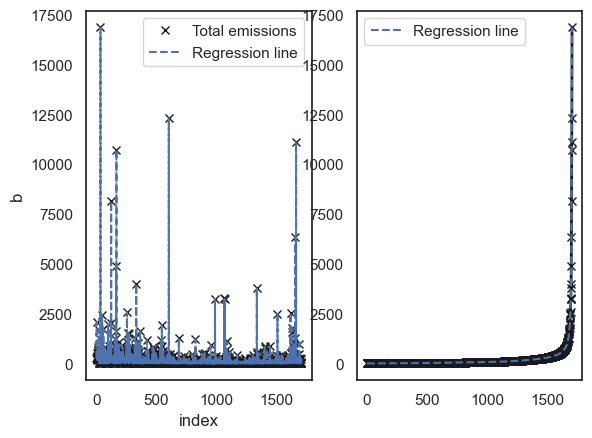

In [118]:
#H = explored_dataset
H = linear_model_dataset
b = H.iloc[:, -1] # Total emissions
A = H.iloc[:, :-1] #all other variables
A = np.pad(A, [(0,0), (0,1)], mode='constant', constant_values =1)
U, S, VT = np.linalg.svd(A, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# plot model
fig=plt.figure()
ax = plt.subplot(121)

plt.plot(np.arange(1, 1711), b, 'x', color ='k', linewidth = 2, label ='Total emissions' )
plt.plot(np.arange(1, 1711), A@xtilde, '--', color = 'b', linewidth = 1.5 , markersize=6,
         label ='Regression line')
plt.xlabel('index')
plt.ylabel('b')
plt.legend()

# plot sorted values
ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H.iloc[:, -1])
b = b.iloc[sort_ind]
plt.plot(np.arange(1, 1711), b, 'x-', color ='k', linewidth = 2, label ='' )
plt.plot(np.arange(1, 1711), A[sort_ind]@xtilde, '--', color = 'b', linewidth = 1.5 , markersize=6,
         label ='Regression line')
plt.legend()
plt.show()
MAE = sum(abs(b - A[sort_ind]@xtilde))
MAE